In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ponta do sol
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | cheuskiny
City not found. Skipping...
Processing Record 5 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 6 of Set 1 | talnakh
Processing Record 7 of Set 1 | vieste
Processing Record 8 of Set 1 | zhezkazgan
Processing Record 9 of Set 1 | san ramon
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | lolua
City not found. Skipping...
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | kahului
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | janauba
Processing Record 16 of Set 1 | sagua de tanamo
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | barrow
Processing Record 20 of Set 1 | saleaula
City not found. Skipping...
Processing Record 21 of Set 1 

Processing Record 38 of Set 4 | henties bay
Processing Record 39 of Set 4 | te anau
Processing Record 40 of Set 4 | quatre cocos
Processing Record 41 of Set 4 | hay river
Processing Record 42 of Set 4 | korla
Processing Record 43 of Set 4 | bathsheba
Processing Record 44 of Set 4 | san patricio
Processing Record 45 of Set 4 | la seyne-sur-mer
Processing Record 46 of Set 4 | sorland
Processing Record 47 of Set 4 | cayenne
Processing Record 48 of Set 4 | ponta delgada
Processing Record 49 of Set 4 | repnoye
Processing Record 50 of Set 4 | lebu
Processing Record 1 of Set 5 | sistranda
Processing Record 2 of Set 5 | hanchuan
Processing Record 3 of Set 5 | saint-joseph
Processing Record 4 of Set 5 | yumen
Processing Record 5 of Set 5 | la asuncion
Processing Record 6 of Set 5 | peace river
Processing Record 7 of Set 5 | samusu
City not found. Skipping...
Processing Record 8 of Set 5 | gbarnga
Processing Record 9 of Set 5 | luau
Processing Record 10 of Set 5 | council bluffs
Processing Recor

Processing Record 24 of Set 8 | cagayan de tawi-tawi
City not found. Skipping...
Processing Record 25 of Set 8 | atasu
Processing Record 26 of Set 8 | sechura
Processing Record 27 of Set 8 | la ronge
Processing Record 28 of Set 8 | kununurra
Processing Record 29 of Set 8 | eureka
Processing Record 30 of Set 8 | tupa
Processing Record 31 of Set 8 | darfo
Processing Record 32 of Set 8 | port arthur
Processing Record 33 of Set 8 | saldanha
Processing Record 34 of Set 8 | loukisia
Processing Record 35 of Set 8 | puerto escondido
Processing Record 36 of Set 8 | rostaq
City not found. Skipping...
Processing Record 37 of Set 8 | pembroke
Processing Record 38 of Set 8 | pangnirtung
Processing Record 39 of Set 8 | victor harbor
Processing Record 40 of Set 8 | westport
Processing Record 41 of Set 8 | gobo
Processing Record 42 of Set 8 | arlit
Processing Record 43 of Set 8 | keti bandar
Processing Record 44 of Set 8 | east london
Processing Record 45 of Set 8 | aksha
Processing Record 46 of Set 8

Processing Record 10 of Set 12 | makhachkala
Processing Record 11 of Set 12 | bolshiye uki
City not found. Skipping...
Processing Record 12 of Set 12 | tygda
Processing Record 13 of Set 12 | jurado
Processing Record 14 of Set 12 | araouane
Processing Record 15 of Set 12 | borogontsy
Processing Record 16 of Set 12 | quesnel
Processing Record 17 of Set 12 | benjamin constant
Processing Record 18 of Set 12 | porosozero
Processing Record 19 of Set 12 | hailey
Processing Record 20 of Set 12 | katastarion
Processing Record 21 of Set 12 | sioux lookout
Processing Record 22 of Set 12 | salinas
Processing Record 23 of Set 12 | guipavas
Processing Record 24 of Set 12 | dzhebariki-khaya
Processing Record 25 of Set 12 | kazanskaya
Processing Record 26 of Set 12 | sri aman
Processing Record 27 of Set 12 | belyy yar
Processing Record 28 of Set 12 | bogale
Processing Record 29 of Set 12 | kudat
Processing Record 30 of Set 12 | tortoli
Processing Record 31 of Set 12 | idritsa
Processing Record 32 of S

In [10]:
len(city_data)

562

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ponta Do Sol,32.6667,-17.1000,67.12,62,24,7.43,PT,2021-12-01 17:46:13
1,Ushuaia,-54.8000,-68.3000,53.26,47,40,13.80,AR,2021-12-01 17:45:10
2,Mataura,-46.1927,168.8643,51.48,97,26,1.81,NZ,2021-12-01 17:46:14
3,Petropavlovsk-Kamchatskiy,53.0452,158.6483,23.59,100,90,8.95,RU,2021-12-01 17:43:28
4,Talnakh,69.4865,88.3972,-21.96,97,87,6.64,RU,2021-12-01 17:46:14
5,Vieste,41.8825,16.1750,54.32,67,46,14.52,IT,2021-12-01 17:46:15
6,Zhezkazgan,47.8043,67.7144,28.87,76,100,10.78,KZ,2021-12-01 17:46:15
7,San Ramon,37.7799,-121.9780,66.76,75,1,3.44,US,2021-12-01 17:46:15
8,Hermanus,-34.4187,19.2345,63.90,72,86,10.22,ZA,2021-12-01 17:46:16
9,Kapaa,22.0752,-159.3190,77.32,84,75,12.66,US,2021-12-01 17:46:17


In [12]:
# New column order
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ponta Do Sol,PT,2021-12-01 17:46:13,32.6667,-17.1000,67.12,62,24,7.43
1,Ushuaia,AR,2021-12-01 17:45:10,-54.8000,-68.3000,53.26,47,40,13.80
2,Mataura,NZ,2021-12-01 17:46:14,-46.1927,168.8643,51.48,97,26,1.81
3,Petropavlovsk-Kamchatskiy,RU,2021-12-01 17:43:28,53.0452,158.6483,23.59,100,90,8.95
4,Talnakh,RU,2021-12-01 17:46:14,69.4865,88.3972,-21.96,97,87,6.64
5,Vieste,IT,2021-12-01 17:46:15,41.8825,16.1750,54.32,67,46,14.52
6,Zhezkazgan,KZ,2021-12-01 17:46:15,47.8043,67.7144,28.87,76,100,10.78
7,San Ramon,US,2021-12-01 17:46:15,37.7799,-121.9780,66.76,75,1,3.44
8,Hermanus,ZA,2021-12-01 17:46:16,-34.4187,19.2345,63.90,72,86,10.22
9,Kapaa,US,2021-12-01 17:46:17,22.0752,-159.3190,77.32,84,75,12.66


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_data into the CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

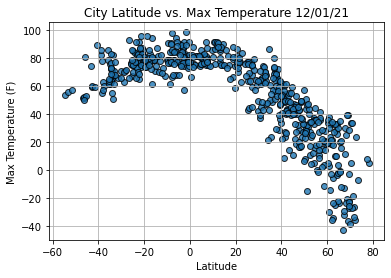

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

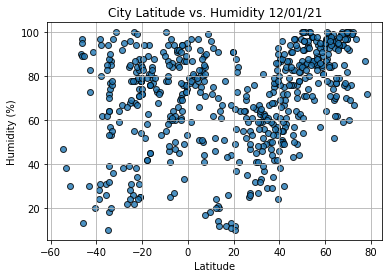

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

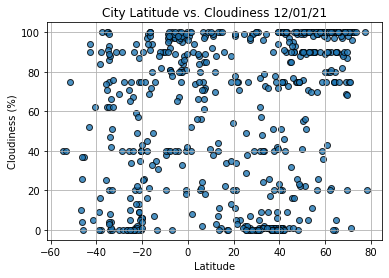

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

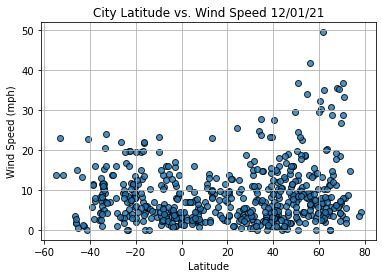

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# File to Load (Remember to change these)
city_data_to_load = "weather_data/cities.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)

In [28]:
index13 = city_data_df.loc[13]

In [29]:
city_data_df["Lat"] >=0

0       True
1      False
2      False
3       True
4       True
       ...  
557    False
558     True
559    False
560     True
561     True
Name: Lat, Length: 562, dtype: bool

In [30]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Ponta Do Sol,PT,2021-12-01 17:46:13,32.6667,-17.1000,67.12,62,24,7.43
3,3,Petropavlovsk-Kamchatskiy,RU,2021-12-01 17:43:28,53.0452,158.6483,23.59,100,90,8.95
4,4,Talnakh,RU,2021-12-01 17:46:14,69.4865,88.3972,-21.96,97,87,6.64
5,5,Vieste,IT,2021-12-01 17:46:15,41.8825,16.1750,54.32,67,46,14.52
6,6,Zhezkazgan,KZ,2021-12-01 17:46:15,47.8043,67.7144,28.87,76,100,10.78


In [31]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

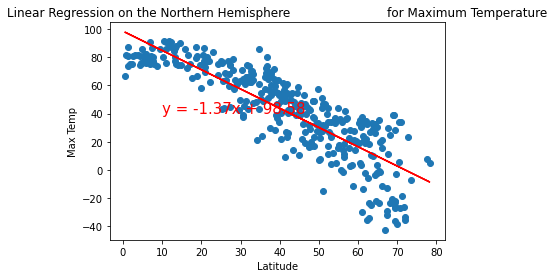

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

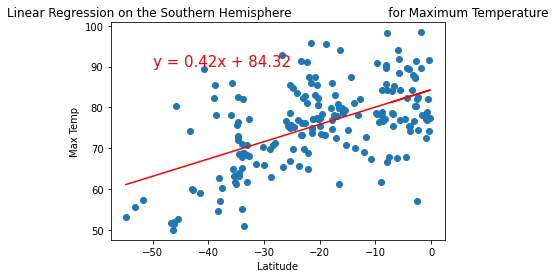

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

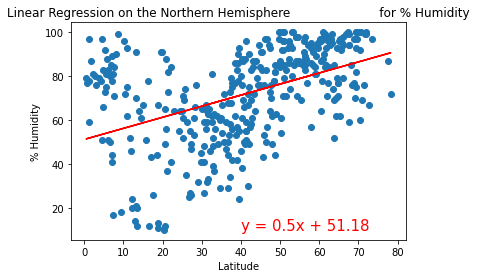

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for % Humidity', '% Humidity',(40,10))

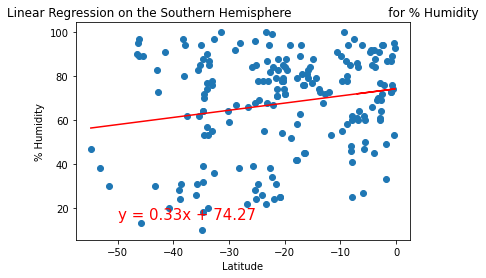

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

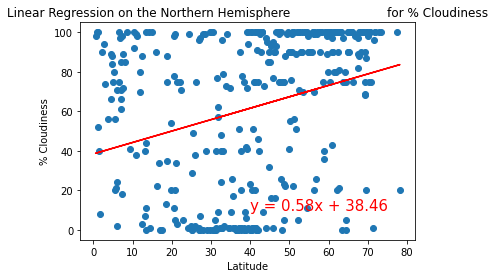

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

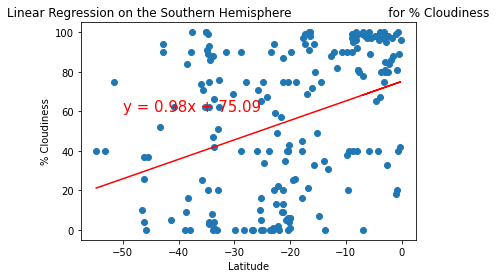

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

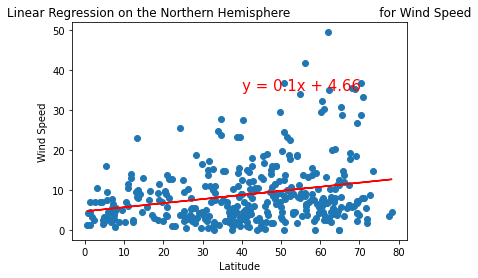

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for Wind Speed', 'Wind Speed',(40,35))

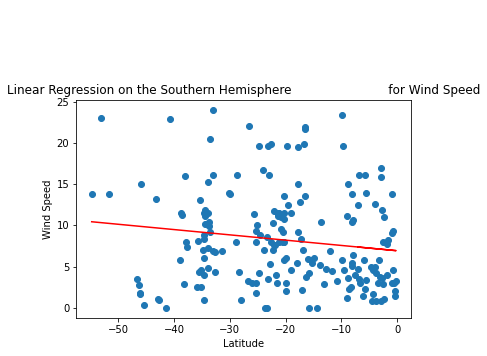

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))